<h1>Análise de indicadores macroeconônmicos: Selic e IPCA </h1> 
<h3>Parte 2</h3>

<hr>
Autor: <a href=https://www.linkedin.com/in/mailson-p-92909928a/> Mailson Vieira Passos <a/>

<hr>

<h2><span id='Motivacao'>Motivação</span></h2>
Muito se fala na mídia sobre inflação e juros e o uso que o Banco Central faz dos juros para controle da inflação. Tenho interesse em entender quão efetivo é o aumento ou diminuição dos juros para controle da inflação, neste caso o IPCA. Para isso vou utilizar a Selic e o IPCA.
</ul>

O que é a Selic?

>A taxa Selic é a taxa básica de juros da economia, que influencia outras taxas de juros do país, como taxas de empréstimos, financiamentos e aplicações financeiras. A definição da taxa Selic é o principal instrumento de política monetária utilizado pelo Banco Central (BC) para controlar a inflação.  
A Selic é a taxa de juros média praticada nas operações compromissadas com títulos públicos federais com prazo de um dia útil. O BC realiza operações no mercado de títulos públicos para que a taxa Selic efetiva esteja em linha com a meta da taxa Selic, que é definida pelo Comitê de Política Monetária (Copom) do BC.  
\
Fonte: <a href = 'https://www.bcb.gov.br/controleinflacao/taxaselic'> <b>Banco Central do Brasil</b> </a>

E o que é o IPCA?


>O Índice Nacional de Preços ao Consumidor Amplo (IPCA) mede a inflação de um conjunto de bens e serviços comercializados no varejo, referentes ao consumo pessoal das famílias, cujo rendimento varia entre 1 e 40 salários mínimos, visando uma cobertura de 90 % das famílias pertencentes as áreas urbanas de abrangência do Sistema Nacional de Índices de Preços ao Consumidor (SNIPC), qualquer que seja a fonte de rendimentos. É calculado a partir dos resultados dos índices regionais, utilizando-se a média aritmética ponderada e cuja a variável de ponderação é o Rendimento Familiar Monetário Disponível, tendo como fonte de informação a Pesquisa de Orçamentos Familiares - POF. Refere-se ao número índice (número de pontos ) das taxas de variações de preços do grupo de bens e serviços.  
\
Fonte: <a href = 'http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=36482&module=M'> <b>IPEA</b> </a>

Em suma, a taxa Selic é taxa básica de juros e ela é a principal ferramenta utilizada para controle de inflação. Já o IPCA é um índice de preços que é usado para monitorar a inflação e é referência para o sistema de metas do Banco Central do Brasil.

<hr>

<h2><span id='Objetivo'>Objetivo</span></h2>
<ul>
    <li>Analisar os dados</li>
</ul>

<hr>
<h2>Requisitos</h2>
O que eu estou usando:

```python
!pip install pandas==2.0.0
!pip install numpy==1.26.1
!pip install matplotlib==3.8.0
!pip install seaborn==0.13.2
!pip install plotly==5.17.0
!pip install statsmodels==0.14.2
!pip install ipywidgets==8.1.1
```
<hr>

<h2><span id='Analise'></span>Análise dos dados</h2>

Vamos analisar os dados já transformados

In [1]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Primeiramente, lemos os dados.

In [2]:
selic_ipca_mensalizada_df = pd.read_csv('dados/selic_ipca_mensal.tsv', sep ='\t')
selic_ipca_noano_df = pd.read_csv('dados/selic_ipca_noano.tsv', sep = '\t')

In [3]:
selic_ipca_mensalizada_df

,periodo_mes,selic_acumulada_nomes,meta_acumulada_nomes,mes,ano,ipca_no_ano,ipca_var_mensal,decada,periodo_timeformat
0,1996-07,1.928529,NaN,JUL,1996,7.74,1.11,1990,1996-07-01
1,1996-08,1.967890,NaN,AGO,1996,8.22,0.44,1990,1996-08-01
2,1996-09,1.904054,NaN,SET,1996,8.38,0.15,1990,1996-09-01
3,1996-10,1.943610,NaN,OUT,1996,8.70,0.30,1990,1996-10-01
4,1996-11,1.895246,NaN,NOV,1996,9.05,0.32,1990,1996-11-01
...,...,...,...,...,...,...,...,...,...
339,2024-10,0.927947,0.936269,OUT,2024,3.88,0.56,2020,2024-10-01
340,2024-11,0.877592,0.885159,NOV,2024,4.29,0.39,2020,2024-11-01
341,2024-12,0.977373,0.985256,DEZ,2024,4.83,0.52,2020,2024-12-01
342,2025-01,1.059180,1.067395,JAN,2025,0.16,0.16,2020,2025-01-01


Olhamos os tipos

In [4]:
selic_ipca_mensalizada_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   periodo_mes            344 non-null    object 
 1   selic_acumulada_nomes  344 non-null    float64
 2   meta_acumulada_nomes   312 non-null    float64
 3   mes                    344 non-null    object 
 4   ano                    344 non-null    int64  
 5   ipca_no_ano            344 non-null    float64
 6   ipca_var_mensal        344 non-null    float64
 7   decada                 344 non-null    int64  
 8   periodo_timeformat     344 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


Corrigimos tipos

In [5]:
selic_ipca_mensalizada_df['periodo_mes'] = pd.PeriodIndex(selic_ipca_mensalizada_df['periodo_mes'], freq = 'M')
selic_ipca_mensalizada_df['periodo_timeformat'] = selic_ipca_mensalizada_df['periodo_mes'].dt.to_timestamp()

In [6]:
selic_ipca_mensalizada_df['mes'] = pd.Categorical(
    selic_ipca_mensalizada_df['mes'], 
    ordered=True, 
    categories = selic_ipca_mensalizada_df.query('ano == 2000')['mes'].to_list()
)

Vamos plotar meta, selic e ipca juntos

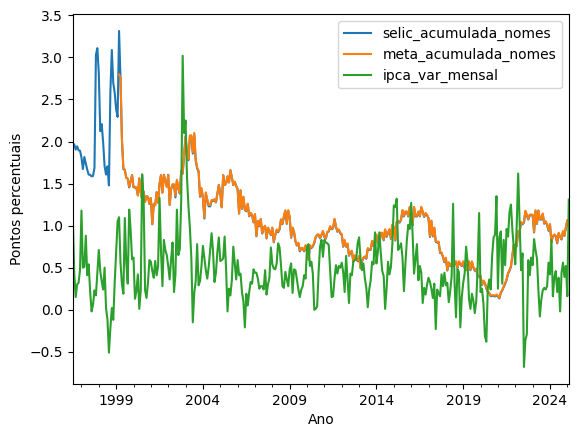

In [7]:
selic_ipca_mensalizada_df.plot(y = ['selic_acumulada_nomes', 'meta_acumulada_nomes', 'ipca_var_mensal'], x = 'periodo_mes')
plt.ylabel('Pontos percentuais')
plt.xlabel('Ano')
plt.show()

Note que não há diferença significativa entre a meta e a selic a não ser que a meta somente foi estabelecida em 1999 e que a maior diferença entre as duas séries foi 0,4 pontos percentuais em suas respectivas versões anualizadas. Além disso, a diferença das versões anualizadas, a partir de 2013, ficou fixa em 0,1. Por conta do exposto e devido a selic_over possuir mais dados, vou somente considerar a selic_acumulada_nomes para as análises daqui em diante.

Considerando que temos séries históricas, vamos usar o mês como coluna para observar variações mensais por ano. Façamos isso para selic, para começar.

In [8]:
selic_pivmensal = selic_ipca_mensalizada_df.pivot(index = 'ano', columns = 'mes', values = 'selic_acumulada_nomes')
selic_pivmensal.head()

mes,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ
ano,,,,,,,,,,,,
1996,NaN,NaN,NaN,NaN,NaN,NaN,1.928529,1.967890,1.904054,1.943610,1.895246,1.891396
1997,1.810888,1.672563,1.816281,1.739499,1.664644,1.606783,1.603456,1.585780,1.590376,1.685632,3.030518,3.109875
1998,2.804617,2.123380,2.206511,1.989665,1.706474,1.606856,1.704627,1.477914,2.589727,3.088117,2.697092,2.577901
1999,2.381418,2.292230,3.314907,2.756349,2.017696,1.671744,1.660066,1.568143,1.558511,1.452823,1.526233,1.599967
2000,1.456648,1.451232,1.449603,1.361878,1.562491,1.391872,1.308368,1.405059,1.285154,1.348557,1.343033,1.257086


Qual será o ano em que houve maior variação da selic?

In [9]:
def plot_var_anual(df: pd.DataFrame) -> None:
    '''
    Gráfico de barras da variação entre janeiro e dezembro de uma tabela em formato amplo (wide format), cujos índices são anos e as colunas são meses
    
    Parametros:
    ---
    df: pd.DataFrame
        Dataframe no formato wide
    '''
    plt.figure(figsize = (12, 10))
    ax = df.dropna().apply(lambda x: (x[-1] - x[0]) / x[0] * 100, axis = 1).plot(kind = 'bar')
    ax.axhline(y = 0, linewidth=.5, color='k')
    ax.bar_label(ax.containers[0], fmt=lambda x: round(x), padding = 3, fontsize = 7, weight = 'bold')
    ax.set_ylabel('Pontos Percentuais')
    plt.plot()

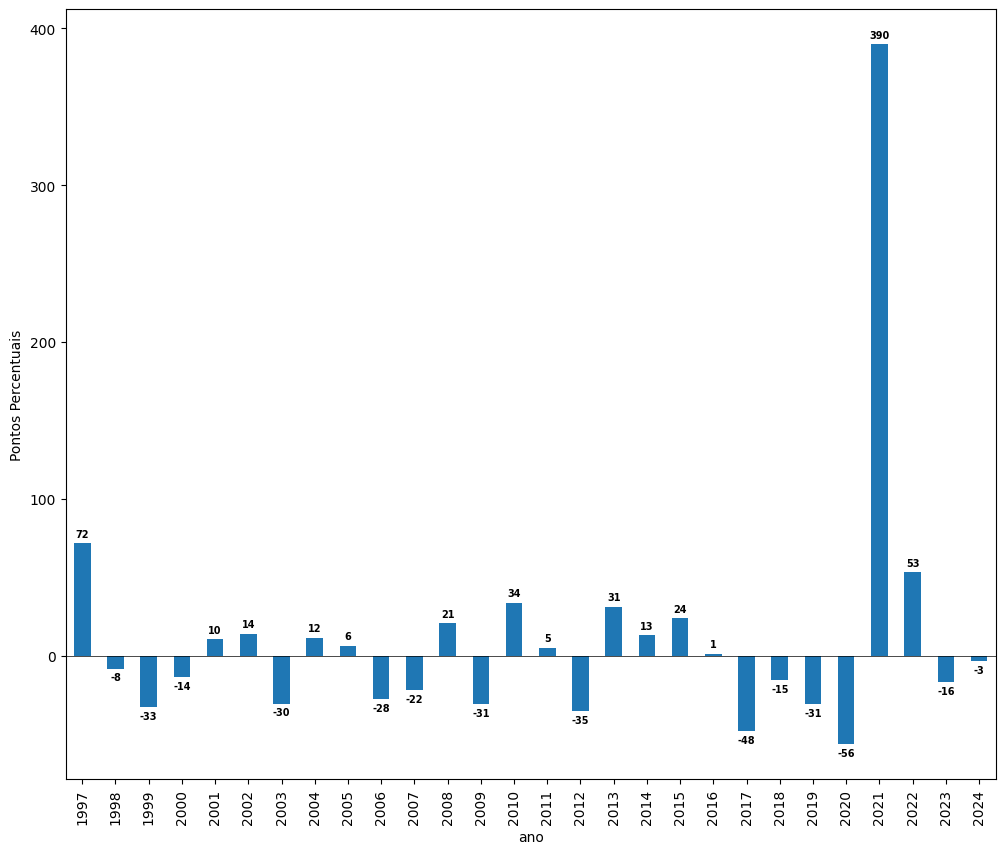

In [10]:
plot_var_anual(selic_pivmensal)

O ano 2021 apresentou o maior crescimento enquanto no ano de 2020 houve o maior decréscimo. Esses são justamente os dois anos que ficaram marcados pela pandemia do coronavírus. Vamos avaliar melhor como se deu essa variação

<Axes: xlabel='mes'>

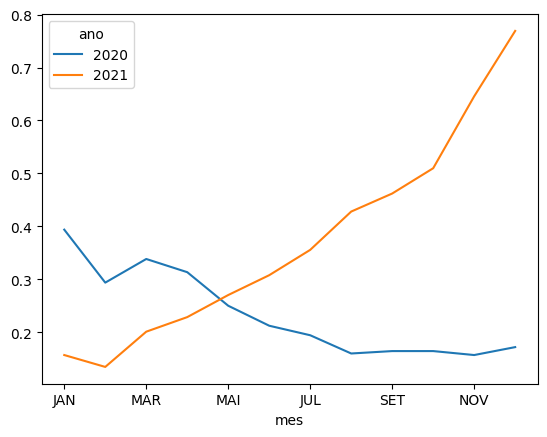

In [11]:
selic_pivmensal.loc[2020:2021, :].T.plot()

Realmente, enquanto percebemos uma tendência de queda na Selic no ano de 2020, a selic durante o ano de 2021 tem um crescimento vertiginoso. O ano 2020 também foi o ano em que a selic atingiu seu <a href= "https://agenciabrasil.ebc.com.br/economia/noticia/2020-08/copom-reduz-juros-basicos-da-economia-para-2-ao-ano">menor valor na história</a>, isso em meio a pandemia. Já em 2021, foi um ano de muitos reajustes, tendo <a href= "https://agenciabrasil.ebc.com.br/economia/noticia/2021-12/copom-aumenta-taxa-basica-de-juros-para-9-25-ao-ano">ocorrido sete</a>, e como a selic (over) tende a acompanhar a meta, isso é repercutido na primeira.

Quais os anos apresentaram maior volatilidade?

In [12]:
def plot_vol_anual(df: pd.DataFrame):
    '''Gráfico de barras do desvio padrão anual de uma tabela em formato amplo (wide format), cujos índices são anos e as colunas são meses
    
    Parametro:
    ---
    df: pd.DataFrame
        DataFrame no formato wide
    '''
    plt.figure(figsize = (12, 10))
    ax = df.dropna().apply('std', axis = 1).plot(kind = 'bar')
    ax.axhline(y = 0, linewidth=.5, color='k')
    ax.bar_label(ax.containers[0], fmt=lambda x: round(x, 2), padding = 3, fontsize = 7, weight = 'bold')
    ax.set_ylabel('Volatilidade')
    plt.plot()

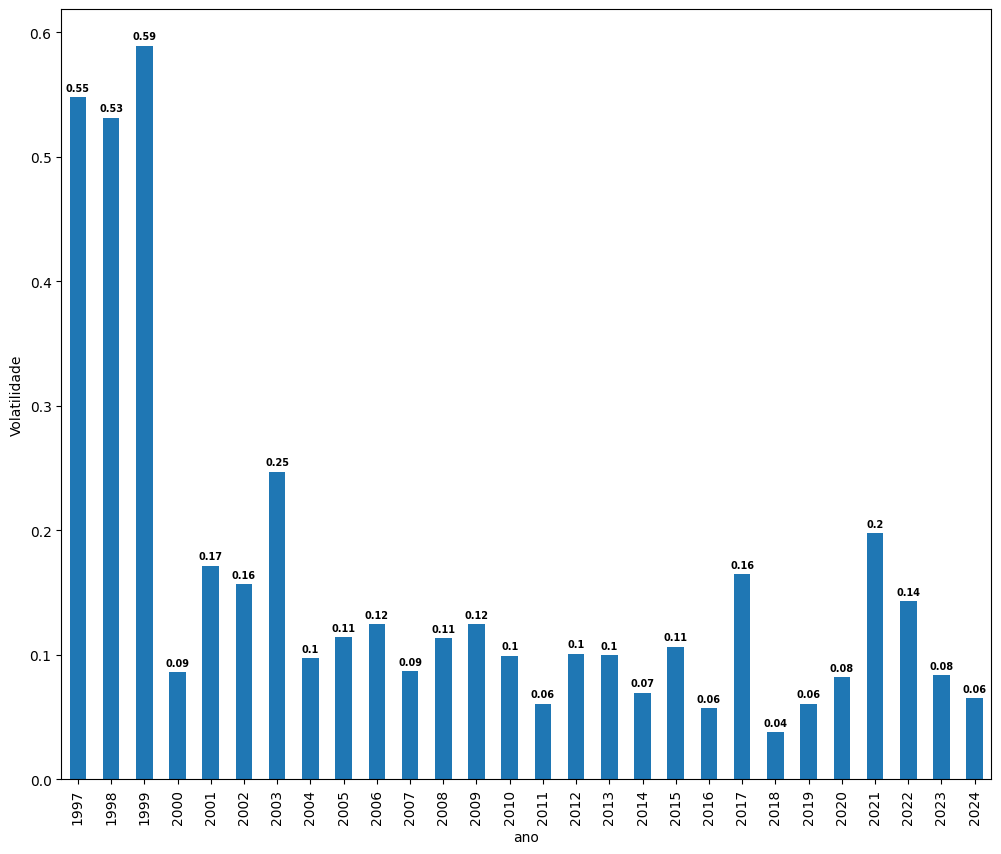

In [13]:
plot_vol_anual(selic_pivmensal)

O trio 97, 98 e 99.

Podemos também avaliar ano a ano qual mês teve maior e a menor taxa

[]

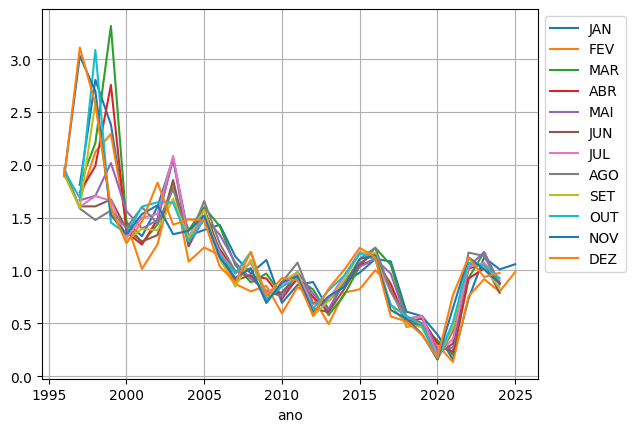

In [14]:
ax = selic_pivmensal.plot()
ax.legend(bbox_to_anchor=(1, 1))
ax.grid()
plt.plot()

Claramente março apresentou o maior valor da taxa selic e isso ocorreu no ano de 1999. Já o mínimo não é tão claro. Vamos visualizar de outra forma.

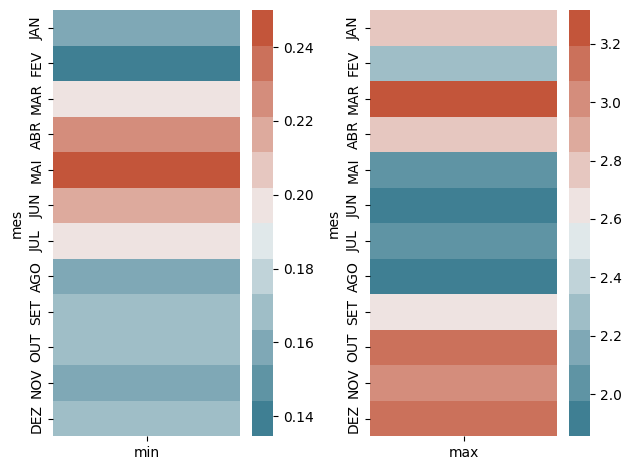

In [15]:
fig, axs = plt.subplots(1, 2)
selic_agg = selic_pivmensal.agg(['min', 'max'],  axis = 0)
sns.heatmap(
    selic_agg.loc['min', :].to_frame(), 
    cmap = sns.diverging_palette(220, 20, n=12),
    ax= axs[0])
sns.heatmap(
    selic_agg.loc['max', :].to_frame(), 
    cmap = sns.diverging_palette(220, 20, n=12), 
    ax= axs[1])
fig.tight_layout()

O mínimo foi em fevereiro de 2021. Separamos também por décadas

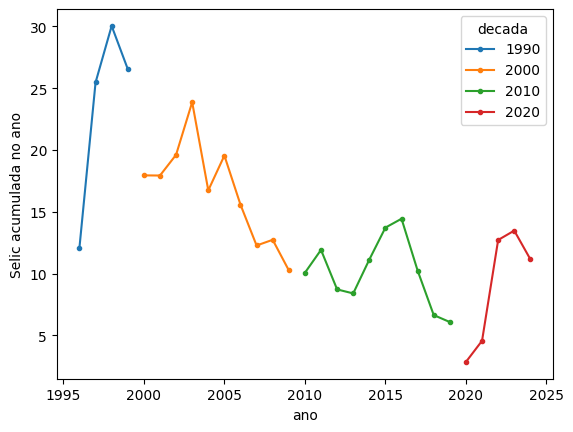

In [16]:
selic_anual_pivot = pd.pivot_table(
    selic_ipca_noano_df, 
    index = 'ano', 
    columns = 'decada', 
    values = 'selic_acumulada_noano', 
)
selic_anual_pivot.plot(style='.-')
plt.ylabel('Selic acumulada no ano')
plt.show()

Vemos que a década de 90 tem um forte crescimento na selic, terminando com a maior variação. Já na década de 2000, temos uma tendência de queda dos juros e isso prossegue até a década de 2010. A década de 2020 inicia com os menores juros acumulados da história, e atinge um pico em 2022-23 e mais recentemente (2024), apresenta uma queda.  
Vamos agora ao IPCA.

In [17]:
ipca_pivot = selic_ipca_mensalizada_df.pivot(index = 'ano', columns = 'mes', values = 'ipca_var_mensal')
ipca_pivot.head()

mes,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ
ano,,,,,,,,,,,,
1996,NaN,NaN,NaN,NaN,NaN,NaN,1.11,0.44,0.15,0.30,0.32,0.47
1997,1.18,0.50,0.51,0.88,0.41,0.54,0.22,-0.02,0.06,0.23,0.17,0.43
1998,0.71,0.46,0.34,0.24,0.50,0.02,-0.12,-0.51,-0.22,0.02,-0.12,0.33
1999,0.70,1.05,1.10,0.56,0.30,0.19,1.09,0.56,0.31,1.19,0.95,0.60
2000,0.62,0.13,0.22,0.42,0.01,0.23,1.61,1.31,0.23,0.14,0.32,0.59


Qual ano que teve a maior varição do ipca? E a menor? Houve variação negativa? Para isso vamos usar o índice.

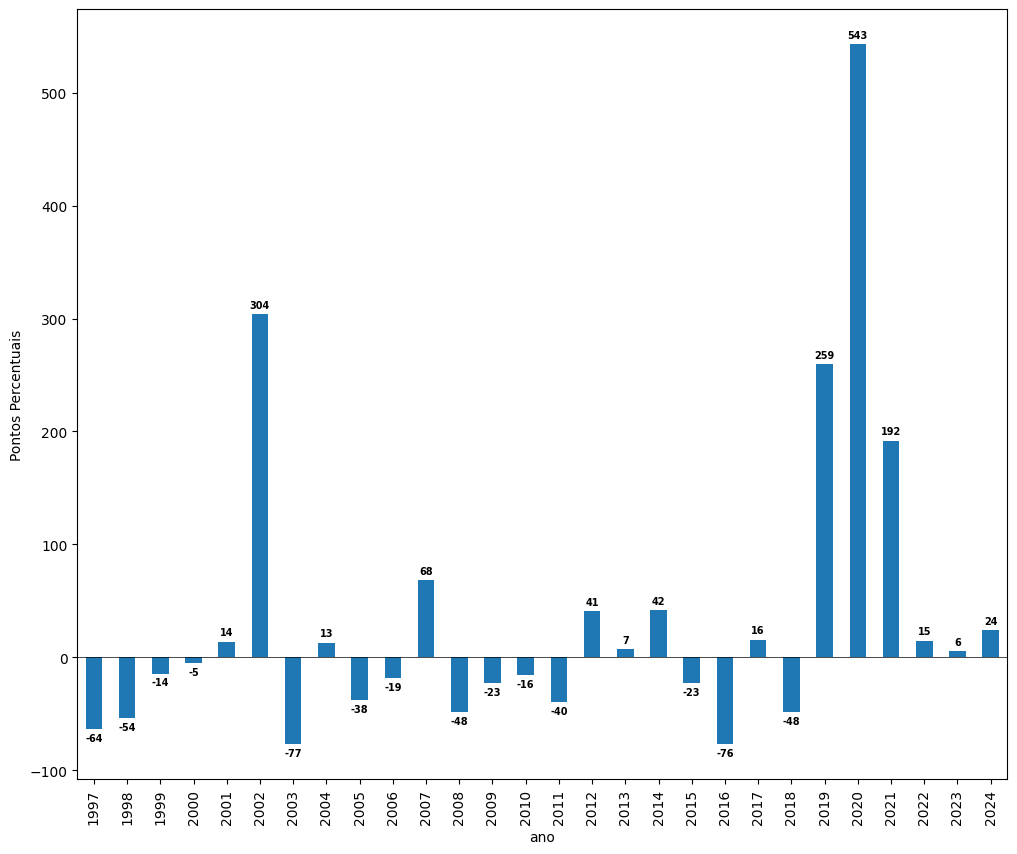

In [18]:
plot_var_anual(ipca_pivot)

A maior variação foi em 2020, que corresponde a um ano antes da maior variação da selic. Isso pode ser tomado como indicativo para subir o ipca de modo a controlar a inflação. O ano de 2003 foi o que teve maior variação negativa, seguido de perto por 2016. O ano que menos variou foi 2000, com uma variação negativa de 5%. Vamos plotar as séries correspondentes aos anos 2020 e 2003.

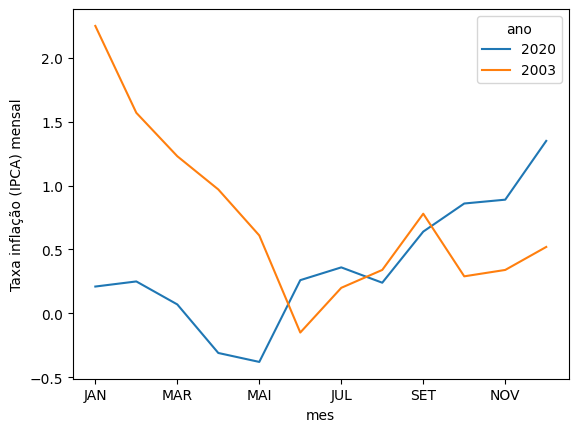

In [19]:
ipca_pivot.loc[[2020, 2003], :].T.plot()
plt.ylabel('Taxa inflação (IPCA) mensal')
plt.show()

O ano 2003 apresentou um rápido decrescimento até junho, onde ficou negativo (deflação) e depois voltou a subir novamente. Segundo <a href = 'https://www1.folha.uol.com.br/fsp/dinheiro/fi1501200406.htm'>Pedro Soares da Folha</a>, o fato de o IPCA esteve alto devido a crise cambial de 2002 provocada pelo temor dos investidores com as eleições. No caso de 2020, há a tendência de crescimento <a href= 'https://g1.globo.com/economia/noticia/2021/01/12/ipca-inflacao-oficial-fecha-2020-em-452percent.ghtml'> devido ao aumento dos preços dos alimentos</a>. Vamos analisar a volatilidade.

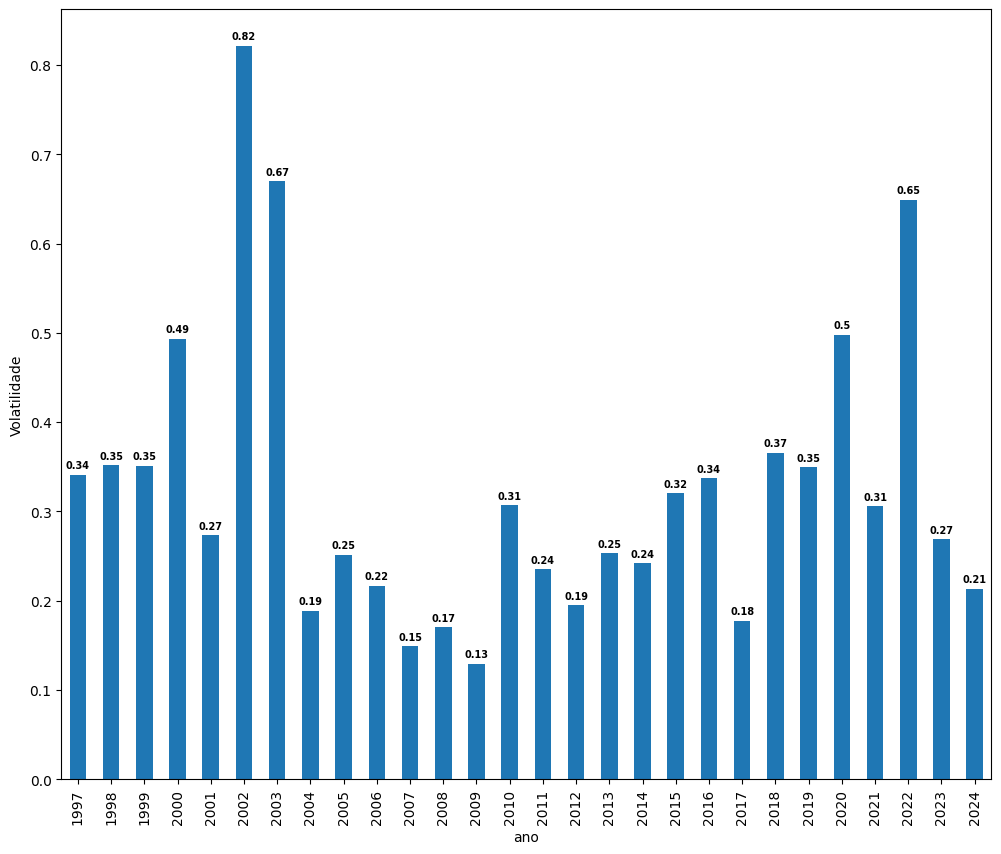

In [20]:
plot_vol_anual(ipca_pivot)

O ano de maior volatilidade no ipca foi 2002, que influenciado pelo aumento do <a href= "https://www1.folha.uol.com.br/fsp/dinheiro/fi1101200314.htm">preço dos alimentos</a> no segundo semestre, atingiu seu pico de 3,02%.

Vamos agora avaliar ano a ano, o comportamento de cada mês

[]

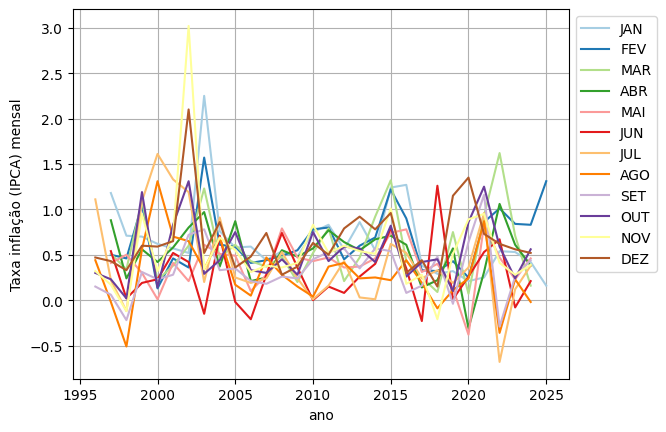

In [21]:
ax = ipca_pivot.plot(color = sns.color_palette('Paired', 12))
ax.set_ylabel('Taxa inflação (IPCA) mensal')
ax.legend(bbox_to_anchor=(1, 1))
ax.grid()
plt.plot()

O valor máximo ocorreu em novembro de 2002 e o mínimo (maior deflação) em julho de 2022.

Como variou o acumulado anual do ipca em cada década?

[]

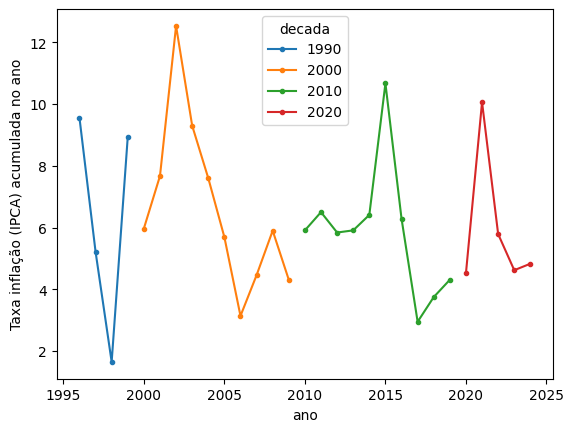

In [22]:
ipca_anual_pivot = pd.pivot_table(
    selic_ipca_noano_df, 
    index = 'ano', 
    columns = 'decada', 
    values = 'ipca_no_ano', 
)
ipca_anual_pivot.plot(style='.-')
plt.ylabel('Taxa inflação (IPCA) acumulada no ano')
plt.plot()

O menor valor ocorreu 1997 logo após uma queda e o maior em 2002. Interessante é que toda década (partido dos anos 2000) tem um pico bem acentuado seguido de uma queda.

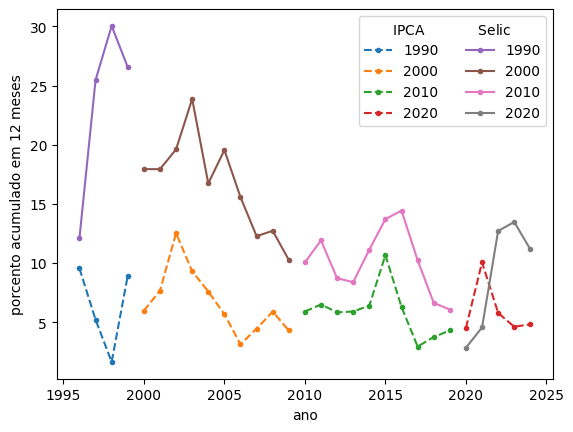

In [23]:
ax = ipca_anual_pivot.plot(style='.--')
selic_anual_pivot.plot(style='.-',ax = ax)
plt.legend(ncol=2, title=r'IPCA$\qquad\qquad$Selic')
plt.ylabel('porcento acumulado em 12 meses')
plt.show()

No gráfico acima, podemos notar que as séries da selic e do ipca, de uma maneira geral, possem algumas similaridades tais como alguns picos e a tendência. Outro ponto importante é a redução na distância conforme os anos. Ademais, na década de 2020 temos a primeira vez em que ipca fica acima da selic, em pontos percentuais.

Outra possível pergunta que pode surgir é qual foi a maior taxa por mês e em qual ano ela ocorreu? Como temos muitos anos, uma forma mais fácil de visualizar é usando plotly.

In [24]:
import plotly.graph_objs as go

def plot_radar_continuo(df: pd.DataFrame, r: str, theta: str, group: str, period: int) -> None:
    '''Plota timeseries de forma contínua num gráfico tipo radar.  
    O dataframe já deve estar ordenado, ou seja, o índice deve aumentar junto com a data (indice aumenta, data aumenta).
    
    Parametros:
    df: pd.DataFrame
        Dataframe contendo a serie a ser plotata
    r: str
        Coluna do dataframe contendo os valores
    theta: str
        Coluna do dataframe com os valores que serão os ângulos
    group: str
        Coluna que contém os grupos de r
    period: int
        Periodo de cada grupo
        '''
    fig = go.Figure()

    df = df[[r, theta, group]]
    groups_list = df[group].unique()
    groups_list_len = len(groups_list)
    for i in range(groups_list_len):
        if i != groups_list_len - 1:
            group_idxs = df[df[group] == groups_list[i]].index
            df_slice = df.loc[np.r_[group_idxs, group_idxs[-1] + 1], :]
        else:
            group_idxs = df[df[group] == groups_list[i]].index
            df_slice = df.loc[group_idxs, :]

        fig.add_trace(go.Scatterpolar(
                r=df_slice[r],
                theta= df_slice[theta],
                hovertemplate = '<b>' + r +'</b>: %{r:.2f}' +
                    '<br><b>'+ theta +'</b>: %{theta}' 
                    '<br><b>' + group + '</b>: ' + str(groups_list[i]),
                name = str(groups_list[i])
            ))

    fig.update_layout(
        polar=dict(radialaxis=dict(
            visible=False,
            )
        ),
        showlegend=True,
        legend = dict(
            x=1,
            y=1,
            traceorder="reversed",
            title_font_family="Times New Roman",
            font=dict(
                family="Courier",
                size=13,
                color="black"
            ),
            bgcolor="LightSteelBlue",
            bordercolor="Black",
            borderwidth= 1
        ),
        title = r.replace('_', ' ').title(),
        titlefont={'size': 28, 'family':'Serif', 'color' : 'white'},
        template='plotly_dark',
        paper_bgcolor='steelblue',
        width=600, height=500
    )
    fig.update_traces(mode="lines")
    fig.show()

In [25]:
def plot_radar_interativo(indice):
    plot_radar_continuo(selic_ipca_mensalizada_df, indice, 'mes', 'ano', 12)

In [26]:
from ipywidgets import interact, interactive, fixed, interact_manual

interact(plot_radar_interativo, indice = {
    'Selic Acumulada no Mês': 'selic_acumulada_nomes',
    'IPCA Variação Mensal': 'ipca_var_mensal'}
)

interactive(children=(Dropdown(description='indice', options={'Selic Acumulada no Mês': 'selic_acumulada_nomes…

<function __main__.plot_radar_interativo(indice)>

Para a selic, o ano de 2020 teve os menores valores por mais meses. Os maiores valores foram para anos do final da década de 1990. O ipca teve maiores variações em 2002 e 2003 e possui mínimo em 2022. 

Vamos analisar cada série individualmente, a começar pela selic.

Text(0, 0.5, 'Taxa selic %')

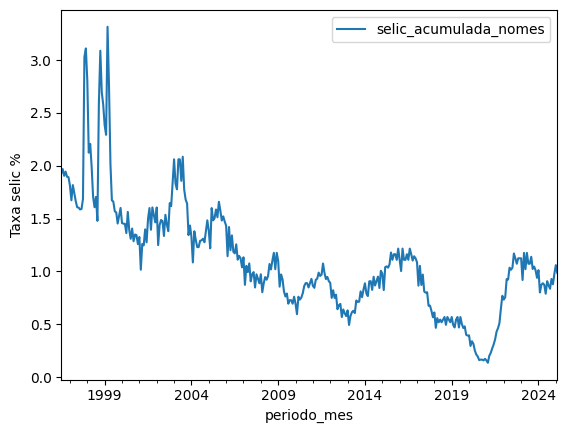

In [27]:
selic_ipca_mensalizada_df.plot(x = 'periodo_mes', y = 'selic_acumulada_nomes')
plt.ylabel('Taxa selic %')

Em uma primeira análise, percebemos que a série da selic possui uma tendência global de decrescimento, o que já nos diz que ela não é estacionária. Não é possível observar sazonalidade. Além disso, temos uma maior variabilidade da taxa entre 1997-2000. Vamos verificar melhor.

In [28]:
def plot_lowess_trend(x: pd.Series, y: pd.Series, grid: bool | None = None) -> None:
    '''Gráfico com ajuste usando lowess
    Parametros:
    ---
    x: pd.Series
        Variável x
    y: pd.Series
        Variável y
    grid: bool, optional
        Se True, plot com linhas de grade. Caso False, não plota linhas de grade
    '''
    lowess_trend_x, lowess_trend_y = zip(*sm.nonparametric.lowess(exog = x, endog = y))
    lowess_trend_x = pd.to_datetime(lowess_trend_x)
    plt.plot(lowess_trend_x, y, '.', label = 'dados')
    plt.plot(lowess_trend_x, lowess_trend_y, label = 'ajuste')
    if grid:
        plt.grid()
    plt.show()

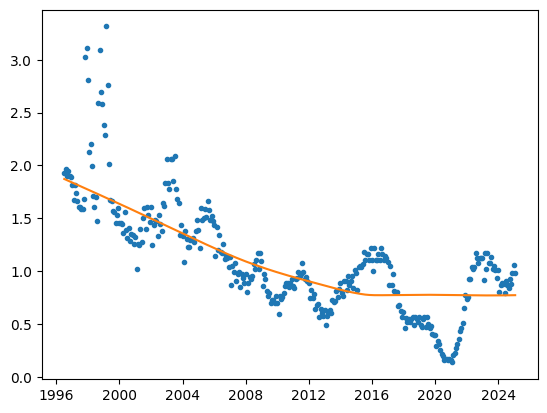

In [29]:
plot_lowess_trend(selic_ipca_mensalizada_df['periodo_timeformat'], selic_ipca_mensalizada_df['selic_acumulada_nomes'])

Do gráfico acima notamos que até 2014 há uma tendência de decrescimento. Após esse período, temos uma tendência aproximadamente constante. Vamos testar a estacionariedade da série.

In [30]:
def teste_adf(ts: pd.Series, reg: str | None = None) -> pd.DataFrame:
    '''Teste Augmented Dickey-Fuller
    
    Parametros:
    ---
    ts: timeseries
        Série a ser testada
    reg: str, optional
        Com tendência ou sem. 

    Retorna:
    ---
    res: pd.DataFrame
        Resultado do teste
    '''
    if reg == 'trend':
        reg = 'ct'
    elif reg == 'quad':
        reg  = 'ctt'
    else:
        reg = 'c'
    adf_res = smt.adfuller(ts, regression = reg)
    res = pd.DataFrame(adf_res[:2], index = ['adf stats', 'pval'], columns = ['adfuller test res'])
    return res


teste_adf(selic_ipca_mensalizada_df['selic_acumulada_nomes'], 'trend')

,adfuller test res
adf stats,-3.549362
pval,0.034398


Para um nível de significância de 5%, nós rejeitamos a hipótese nula e concluímos que a série não tem raiz unitária, ou seja, a série pode ser estacionária. No entanto, a série não possui características de ser estacionária. Será que ela é tendência-estacionária (trend-stationary), ou seja não-estacionária porém sem raiz unitária? Façamos o teste KPSS

In [31]:
def teste_kpss(ts: pd.Series, reg: str | None = None) -> pd.DataFrame:
    '''Teste KPSS

    Parametros:
    ---
    ts: pd.Series
        Série a ser testada
    reg: 
        Com tendência ou sem. 
    
    Retorna:
    ---
    res: pd.DataFrame
        Resultado do teste
    '''
    if reg == 'trend':
        reg = 'ct'
    elif reg == 'constant' or reg is None:
        reg = 'c'
    else:
        print('reg é inválido')
    kpss_res = smt.kpss(ts, regression = reg)
    res = pd.DataFrame(kpss_res[:2], index = ['kpss stats', 'pval'], columns = ['KPSS test res'])
    return res

teste_kpss(selic_ipca_mensalizada_df['selic_acumulada_nomes'], 'trend')

C:\Users\Mailson\AppData\Local\Temp\ipykernel_12420\959858496.py:22: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




,KPSS test res
kpss stats,0.286717
pval,0.010000


Há evidência para rejeitarmos que a série é tendência-estacionária (trend-stationary) em favor da hipótese alternativa de que a série possui raiz unitária. Portanto, temos dois testes com resultados conflitantes, logo a estacionariedade é inconclusiva. Vamos ver se a série é diferenciada-estácionária (difference-stationary), isto é, a tendência média é estocástica (<a href= "https://www.mathworks.com/help/econ/trend-stationary-vs-difference-stationary.html">ref.<a>).

In [32]:
selic_ipca_mensalizada_df = selic_ipca_mensalizada_df.set_index('periodo_mes')

<Axes: xlabel='periodo_mes'>

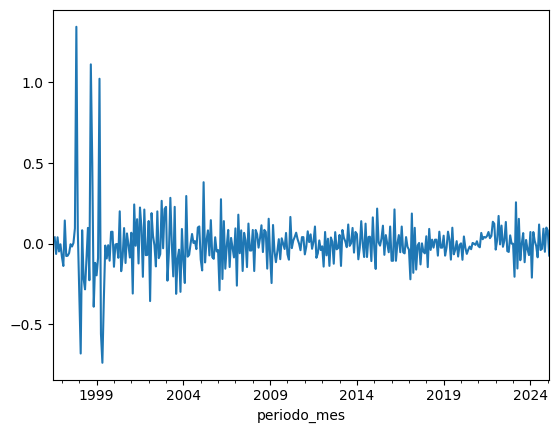

In [33]:
selic_dif = selic_ipca_mensalizada_df['selic_acumulada_nomes'].diff()
selic_dif.plot()

Vamos aos testes

In [34]:
teste_adf(selic_dif[1:])

,adfuller test res
adf stats,-5.039134
pval,0.000019


In [35]:
teste_kpss(selic_dif[1:])

C:\Users\Mailson\AppData\Local\Temp\ipykernel_12420\959858496.py:22: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




,KPSS test res
kpss stats,0.057761
pval,0.100000


Concluímos, para um nível de significância de 5%, que a série diferenciada é estacionária. Então a série histórica Selic acumulada mensal é uma série diferenciada-estacionária (difference-stationary). Perceba que diferenciando a série, eliminamos a tendência que ela tinha.

No caso da sazonalidade, para estudar melhor, vamos plotar um gráfico de violinos

<Axes: xlabel='mes', ylabel='selic_acumulada_nomes'>

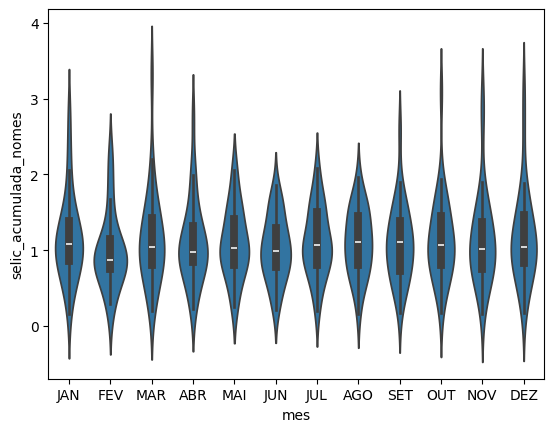

In [36]:
sns.violinplot(data = selic_ipca_mensalizada_df, x = 'mes', y = 'selic_acumulada_nomes')

Talvez a sazonalidade seja melhor perceptível na série sem tendência.

<Axes: xlabel='mes', ylabel='selic_dif'>

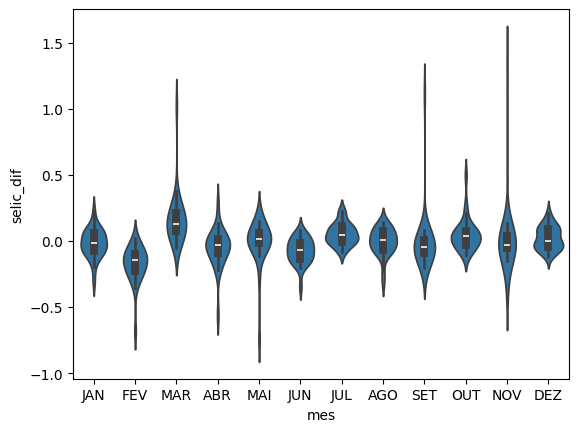

In [37]:
selic_ipca_mensalizada_df['selic_dif'] = selic_dif
sns.violinplot(data = selic_ipca_mensalizada_df, x = 'mes', y = 'selic_dif')

Nenhuma sazonalidade é perceptível. Podemos decompor a série para analisar melhor e como temos uma tendência perceptível, vamos usar decomposição de tendência-sazonalidade com loess.

In [38]:
def stl_decomp_plot(data: pd.Series, period: int) -> None:
    '''Plota a decomposição da série temporal em tendência, sazonalidade e resíduos

    Parametros:
    ---
    data: pd.Serie
        Série a ser decomposta
    period: it
        período de sazonalidade
    '''
    
    data_decomp = smt.STL(data, period = period).fit()

    fig, axs = plt.subplots(4, 1, sharex=True)

    axs[0].plot(data_decomp.observed)
    axs[0].set_ylabel('Série')
    
    axs[1].plot(data_decomp.trend)
    axs[1].set_ylabel('Tendência')
    
    axs[2].plot(data_decomp.seasonal)
    axs[2].set_ylabel('Sazonalidade')
    
    axs[3].plot(data_decomp.resid)
    axs[3].set_ylabel('Resíduos')

    plt.show()

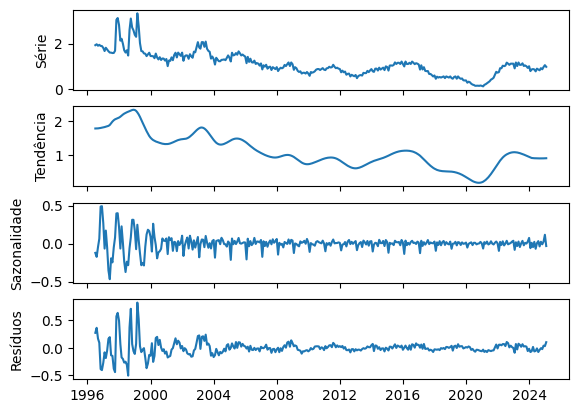

In [39]:
stl_decomp_plot(selic_ipca_mensalizada_df[['selic_acumulada_nomes', 'periodo_timeformat']].set_index('periodo_timeformat'), 12)

Concluímos que não temos sazonalidade. O que temos são alguns ciclos.

Vamos plotar a função de autocorrelação (ACF) para a selic.

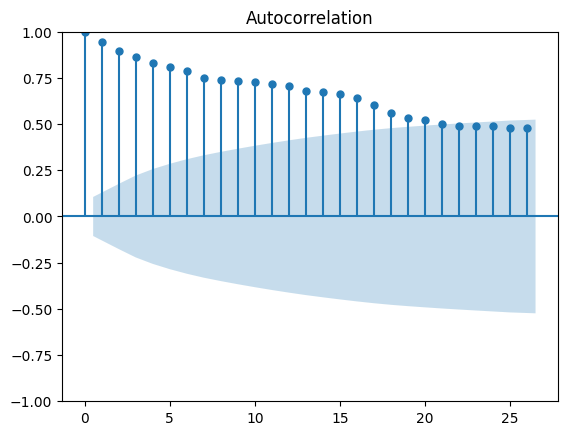

In [40]:
smg.tsa.plot_acf(selic_ipca_mensalizada_df['selic_acumulada_nomes']);

Podemos perceber que o gráfico do ACF apresenta um padrão de série não estacionária. 

Podemos também verificar que a série histórica da selic exibe maior volatilidade no final da década de 90 e início dos anos 2000, como é possível ver no gráfico abaixo

<Axes: xlabel='periodo_mes'>

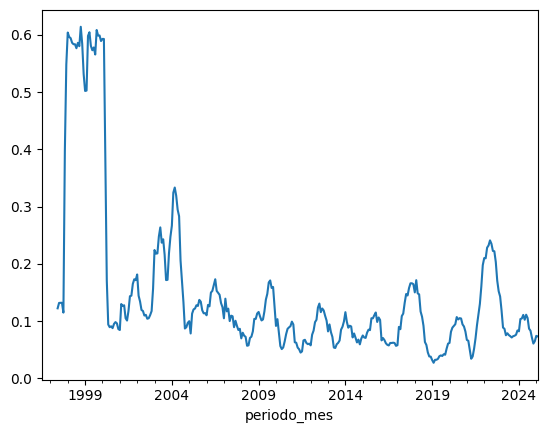

In [41]:
selic_ipca_mensalizada_df['selic_acumulada_nomes'].rolling(12).std().plot()

Por fim, vamos plotar a distribuição

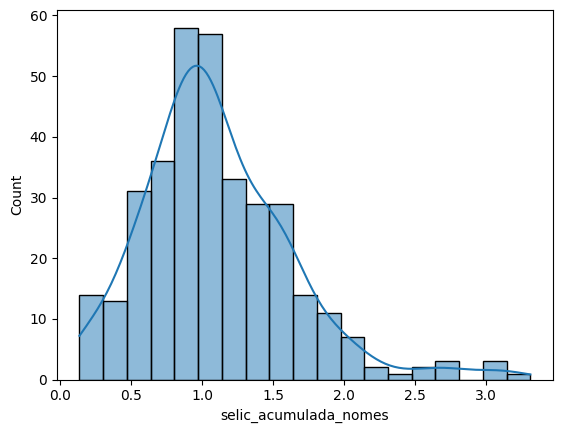

In [42]:
ax = sns.histplot(selic_ipca_mensalizada_df['selic_acumulada_nomes'], kde = True)

Claramente não é normal, além disso, temos uma assimetria positiva, devido aos valores da taxa alcançados no final da década de 90 e início da década de 2000.

In [43]:
selic_ipca_mensalizada_df['selic_acumulada_nomes'].describe().to_frame('Stats')

,Stats
count,344.000000
mean,1.106582
std,0.526895
min,0.134532
25%,0.786077
50%,1.028511
75%,1.394495
max,3.314907


Apesar disso, média não difere tanto da mediana. Vamos plotar o gráfico quantil-quantil

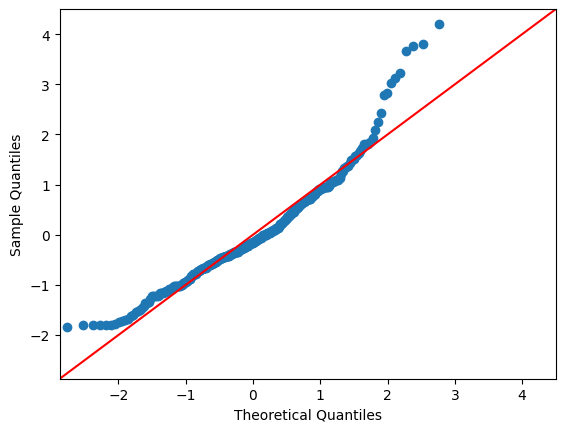

In [44]:
sm.qqplot(selic_ipca_mensalizada_df['selic_acumulada_nomes'], fit=True, line="45")
plt.show()

Confirmando que não temos uma distribuição normal. As duas pontas tendem a se distanciar da reta em vermelho.

Agora é a vez do IPCA.

<Axes: xlabel='periodo_mes'>

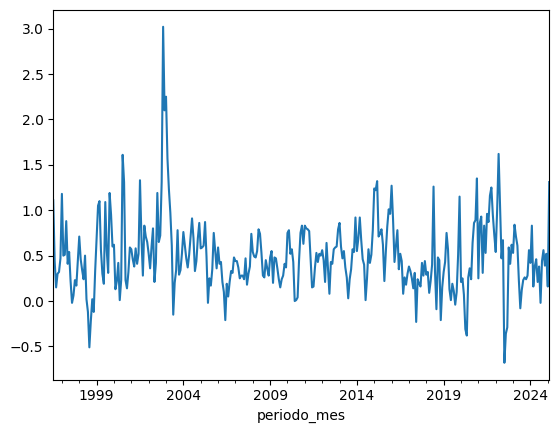

In [45]:
selic_ipca_mensalizada_df['ipca_var_mensal'].plot()

A série histórica da variação mensal do IPCA aparenta ter média constante, não parece haver sazonalidade e a série exibe maior variação entre 2003 e 2004. Vamos verificar

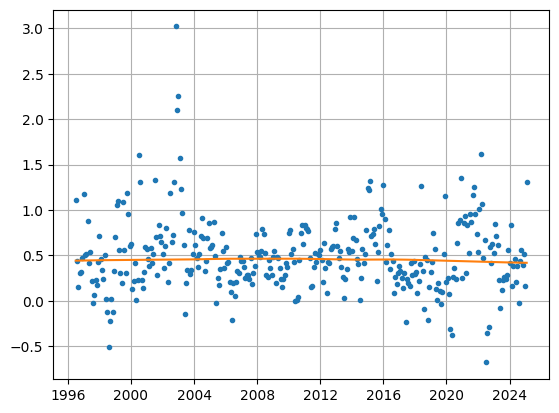

In [46]:
plot_lowess_trend(selic_ipca_mensalizada_df['periodo_timeformat'] ,selic_ipca_mensalizada_df['ipca_var_mensal'], grid = True)

Realmente, a série parece ter uma média constante que independe de t. Checamos se ela é estacionária via teste estatístico

In [47]:
teste_adf(selic_ipca_mensalizada_df['ipca_var_mensal'])

,adfuller test res
adf stats,-9.167669e+00
pval,2.435818e-15


Rejeitamos a hipótese dela ter raiz unitária, para um nível de significância de 5%. Façamos o teste KPSS só para confirmar

In [48]:
teste_kpss(selic_ipca_mensalizada_df['ipca_var_mensal'])

C:\Users\Mailson\AppData\Local\Temp\ipykernel_12420\959858496.py:22: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




,KPSS test res
kpss stats,0.117696
pval,0.100000


Não rejeitamos a hipótese da série ser estacionária. Concluimos com os dois testes que a série é estacionária. Analisamos, agora, a sazonalidade.

<Axes: xlabel='mes', ylabel='ipca_var_mensal'>

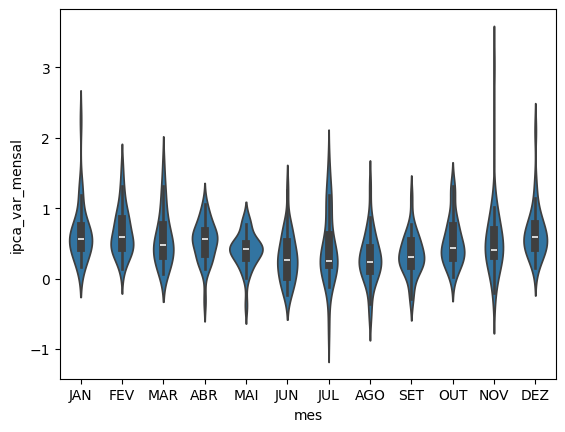

In [49]:
sns.violinplot(selic_ipca_mensalizada_df, x = 'mes', y = 'ipca_var_mensal')

Pelo gráfico acima, a série não exibe sazonalidade forte. Vamos decompor.

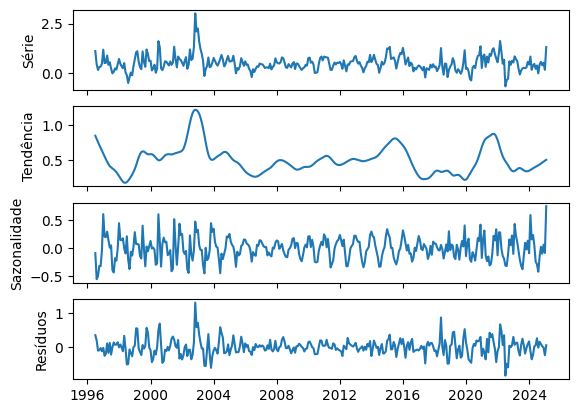

In [50]:
stl_decomp_plot(selic_ipca_mensalizada_df[['ipca_var_mensal', 'periodo_timeformat']].set_index('periodo_timeformat'), 12)

O IPCA não exibe sazonalidade. Plotamos agora o ACF e PACF

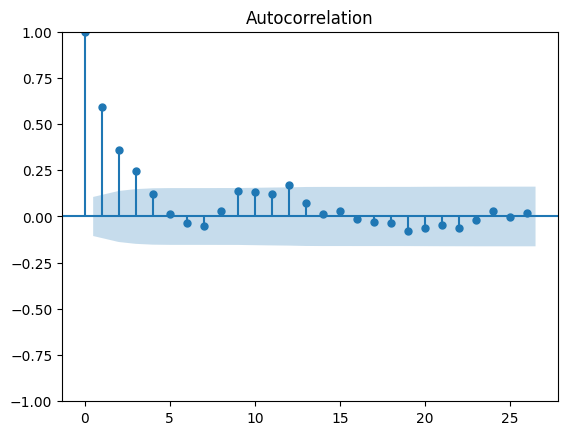

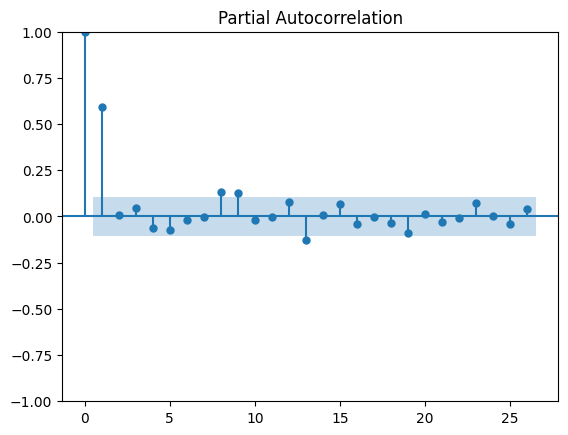

In [51]:
smg.tsa.plot_acf(selic_ipca_mensalizada_df['ipca_var_mensal']);
smg.tsa.plot_pacf(selic_ipca_mensalizada_df['ipca_var_mensal']);

Usando os dois gráficos, o ipca pode ser descrito, pelo método de Box-Jenkins,  por um processo: AR(1) ou ARMA(1, 1).

Checamos como se comporta o desvio padrão numa janela de 12 meses

<Axes: xlabel='periodo_mes'>

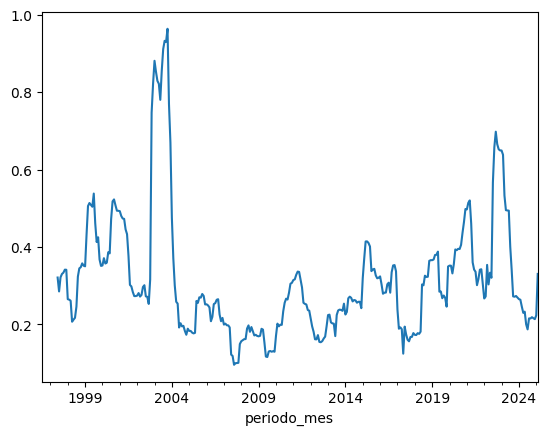

In [52]:
selic_ipca_mensalizada_df['ipca_var_mensal'].rolling(12).std().plot()

O maior pico que observamos é entre 2003 e 2004. 

Com base nos dados obtidos e em toda a informação coletada eu me pergunto se mudanças na selic têm efeito na inflação, nesse caso, na variação mensal do IPCA? Para responder vamos visualizar um gráfico de dispersão

<Axes: xlabel='selic_acumulada_nomes', ylabel='ipca_var_mensal'>

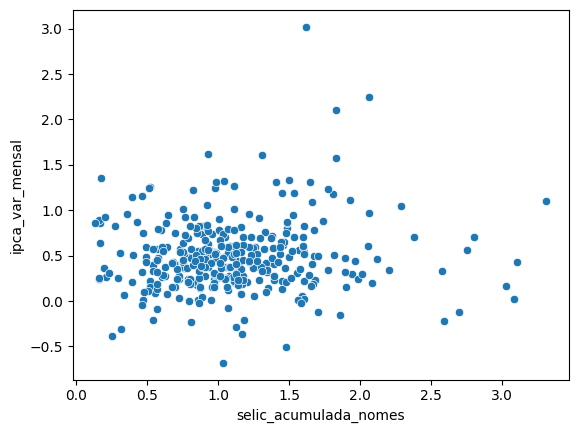

In [53]:
sns.scatterplot(selic_ipca_mensalizada_df, y = 'ipca_var_mensal', x = 'selic_acumulada_nomes')

Vamos ver se há correlação

In [54]:
def plot_scatter(x: np.array, y: np.array, reg : bool | None = None, order: int | None = None) -> None:
    '''Plota um gráfico de dispersão com valor de correlação

    Parametros
    ---
    x: np.array
        X
    y: np.array
        Y
    reg: bool, optional
        Plota regressão
    order: bool, optional
        Ordem da regressão
    '''
    
    fig, ax = plt.subplots()

    if reg:
        if order is None:
            order = 1
        sns.regplot(x = x, y = y, order = order, ax = ax, line_kws={"color": "C1"})
    else:
        ax.scatter(x, y)

    data_vals = pd.DataFrame(np.c_[x, y], columns = ['x', 'y']).dropna()
    corr, pval = stats.pearsonr(data_vals['x'], data_vals['y'])
    
    ax.set_title('corr = {:.2f}  pval = {:.2e}'.format(corr, pval))
    plt.show()

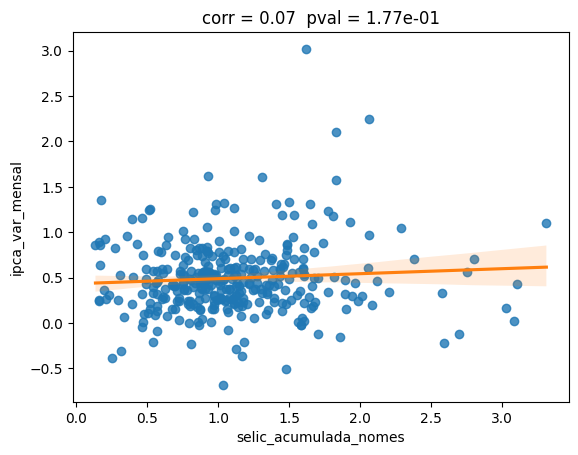

In [55]:
plot_scatter(selic_ipca_mensalizada_df['selic_acumulada_nomes'], selic_ipca_mensalizada_df['ipca_var_mensal'], reg = True)

Temos uma associação linear muito fraca, porém positiva. Podemos checar o gráfico da função de correlação cruzada para observar se 

In [56]:
def plot_ccf(ts1: np.array, ts2: np.array, lags: int | None = None, grid: bool | None = None) -> None:
    '''Gráfico da função de correlação cruzada entre duas séries históricas
    
    Parametros:
    ---
    ts1: np.array
        Série temporal 1
    ts2: np.array
        Série temporal 2
    lags: int, optional
        Quantos lags plotar
    grid: bool, optional
        Caso True, plot linha de grade
    '''
    if not lags:
        lags = 25
    backwards = smt.ccf(ts1[::-1], ts2[::-1], nlags = lags, adjusted=False)[::-1]
    forwards = smt.ccf(ts1, ts2, nlags = lags, adjusted=False)
    ccf_output = np.r_[backwards[-lags:], forwards[1:lags]]
    x_range = range(-len(ccf_output)//2 + 1, len(ccf_output)//2 + 1)
    
    plt.stem(x_range,  ccf_output)
    plt.xlabel('Lag')
    plt.ylabel('ACF')
    
    conf_int_inf, conf_int_sup = -1.96/np.sqrt(len(ts1)), 1.96/np.sqrt(len(ts2))
    plt.fill_between(x_range, conf_int_inf, conf_int_sup, alpha=0.2)

    if grid:
        plt.grid()
    plt.show()

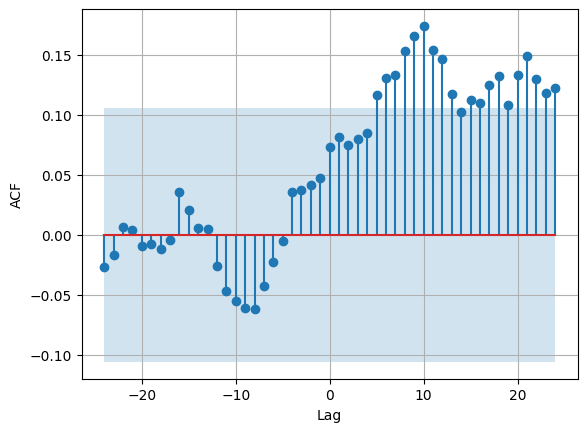

In [57]:
plot_ccf(selic_ipca_mensalizada_df['selic_acumulada_nomes'], selic_ipca_mensalizada_df['ipca_var_mensal'], grid = True)

Temos um pico no lag 10, indicando que o ipca em t tem maior correlação com a selic em t + 10. Dados que cada lag corresponde a um mês, então podemos dizer que a selic está defasada em 10 meses do ipca. Note ainda que apesar da correlação ser estatisticamente significante, ela ainda é baixa.

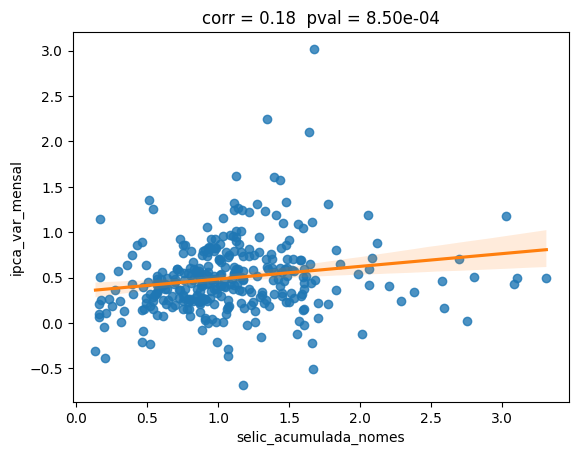

In [58]:
plot_scatter(selic_ipca_mensalizada_df['selic_acumulada_nomes'].shift(-10), selic_ipca_mensalizada_df['ipca_var_mensal'], reg = True)